In [2]:
import numpy as np
import scipy
from scipy import special
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook
plt.style.use('seaborn-pastel')

<IPython.core.display.Javascript object>


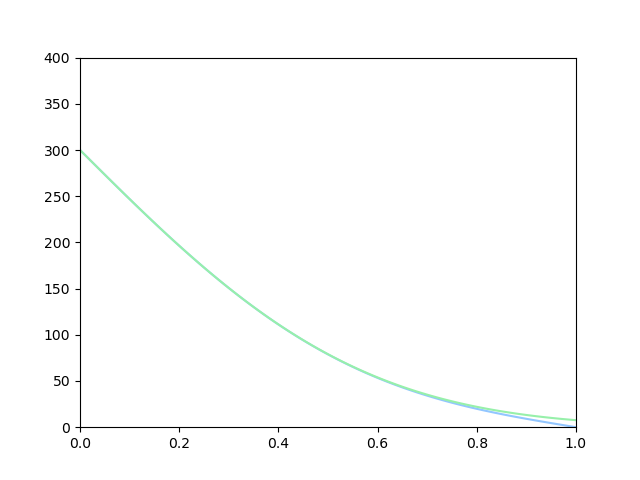

[[300.           0.           0.         ...   0.           0.
    0.        ]
 [300.         120.           0.         ...   0.           0.
    0.        ]
 [300.         144.          48.         ...   0.           0.
    0.        ]
 ...
 [300.         294.64400451 289.29068458 ...   1.75451166   0.8763766
    0.        ]
 [300.         294.64507473 289.2928234  ...   1.75591826   0.87707998
    0.        ]
 [300.         294.64614431 289.29496092 ...   1.75732472   0.8777833
    0.        ]]


In [55]:
#Схема 0 для линейного уравнения плюсом точное решение в виде функции ошибок
lambd = 0.1
Temp=300
L = 1
T = 1
C_p = 0.4
m = 100
h = L / m
t = C_p * h ** 2 / lambd
n = int(T // t)
x_i = np.arange(0, L+h, h) # значения в узлах по х
t_j = np.linspace(0, T, n) # значение в узлах по t
r_j = len(t_j) # количество узлов по t
r_i = len(x_i) # количество узлов по x
g_t_h = np.zeros([r_j, r_i]) # итоговая сетка размером t_j*x_i
#зададим граничные условия
def fi(x, Temp):
    ans = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] == 0:
            ans[i] = Temp
        else: 
            ans[i] = 0
    return(ans)
T_t_0 = fi(x_i, Temp) # значение при t = 0
T_x_0 = Temp # значение при x = 0
T_x_L = 0
g_t_h[0] = T_t_0 # инициализация сетки t = 0
for i in range(n):
    g_t_h[i][0] = T_x_0 # граничное условие при х =0
for j in range(r_j - 1):#время
    for i in range(1, r_i - 1): #пространство
        g_t_h[j + 1][i] = C_p * g_t_h[j][i + 1] + (1 - 2 * C_p)*g_t_h[j][i] + C_p * g_t_h[j][i - 1]

fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(0, 400))
line = []
N = 2
for j in range(N):
    temp, = plt.plot([], [])
    line.append(temp)
line = tuple(line)
def init():
    for j in range(N):
        line[j].set_data([], [])
    return line,
def animate(i):
    #x_i = np.arange(0, L, h)
    #y = g_t_h[i]
    x_i = np.arange(0, L+h, h)
    y1 = g_t_h[i]
    ksi = x_i / (2 * np.sqrt(lambd * i * t))
    y2 = Temp * special.erfc(ksi)
    line[0].set_data(x_i, y1)
    line[1].set_data(x_i, y2)
    return line,
 
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=25000, interval=0.2, blit=True, repeat = False)
print(g_t_h)        
#зеленое-теоретическое, синее - численное        

<IPython.core.display.Javascript object>


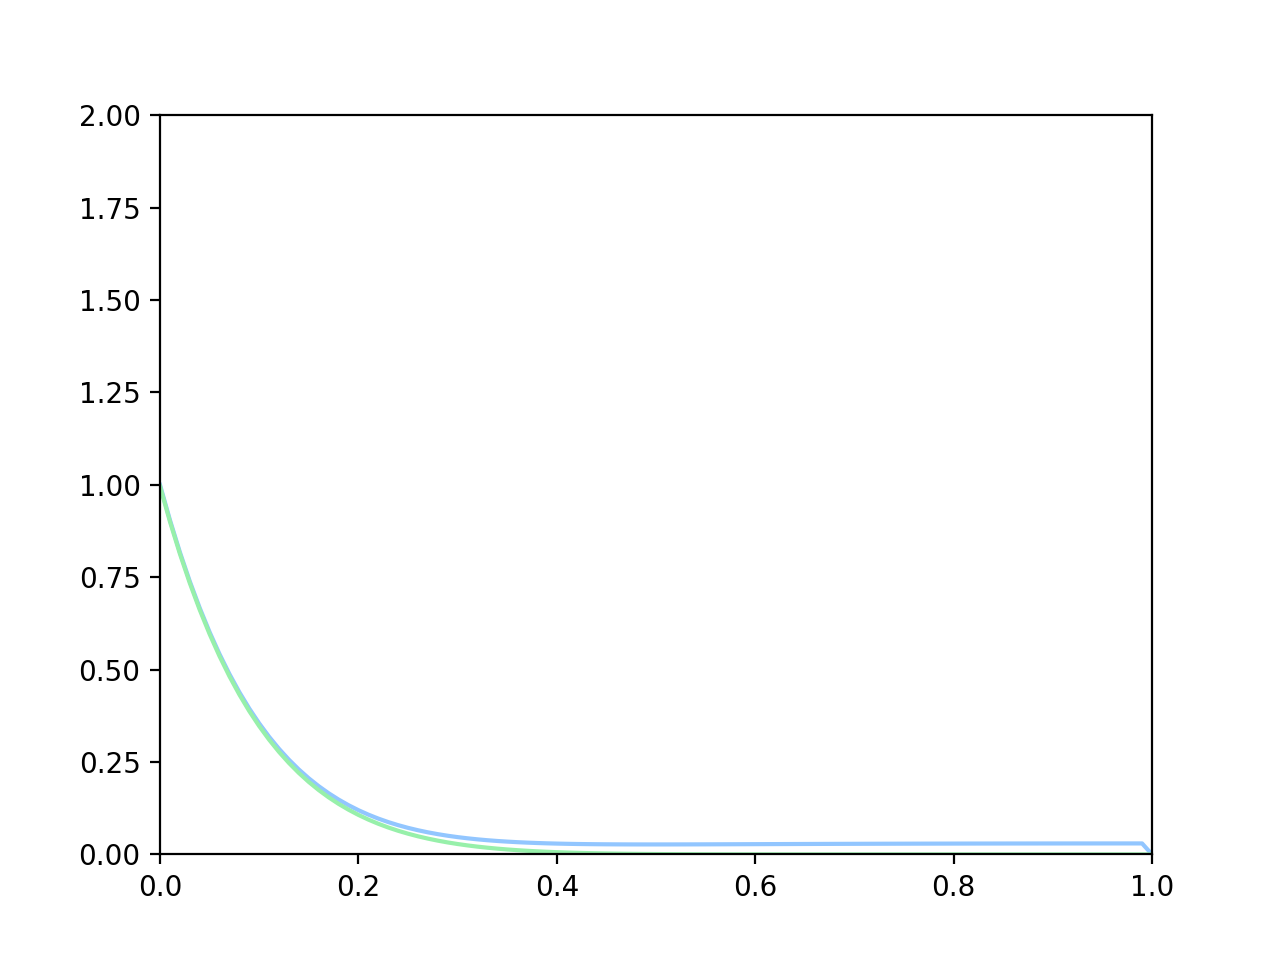

In [13]:
#решение для нелинейной задачи,численное и теоретическое
lambd_0 = 0.1
sigm = 0.1
Temp=1
L = 1
T = 1
C_p = 0.2
m = 100
h = L / m
t = C_p * h ** 2 / (lambd_0 * Temp**sigm)
n = int(T // t)
q = t / (h)**2
eps = 0.03
c = np.sqrt(Temp ** (sigm)*lambd_0 / sigm)
x_i = np.arange(0, L+h, h) # значения в узлах по х
t_j = np.linspace(0, T, n) # значение в узлах по t
r_j = len(t_j) # количество узлов по t
r_i = len(x_i) # количество узлов по x
g_t_h = np.zeros([r_j, r_i]) # итоговая сетка размером t_j*x_i
#граничные условия
g_t_h[0] = eps
for j in range(1, n):
    g_t_h[j][0] = Temp * (t_j[j]) ** (1/sigm)
    
for j in range(r_j - 1):#время
    for i in range(1, r_i - 1): #пространство
        lambd_i_1 = lambd_0 * (g_t_h[j][i - 1])**sigm
        lambd_i = lambd_0 * (g_t_h[j][i])**sigm
        lambd_i1 = lambd_0 * (g_t_h[j][i+1])**sigm
        lambd_plus = 2 * (lambd_i * lambd_i1) / (lambd_i + lambd_i1)
        lambd_minus = 2 * (lambd_i*lambd_i_1) / (lambd_i + lambd_i_1)
        g_t_h[j+1][i] = (g_t_h[j][i] * (1 - q *(lambd_minus + lambd_plus)) + g_t_h[j][i+1] * q * lambd_plus + g_t_h[j][i-1] * lambd_minus*q)

def right_decision(x, t):
    ans = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] <= c * t:
            ans[i] = (sigm * c * (c * t - x[i]) / lambd_0) ** (1 / sigm)
        else:
            ans[i] = 0
    return ans
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(0, 2))
line = []
N = 2
for j in range(N):
    temp, = plt.plot([], [])
    line.append(temp)
line = tuple(line)
def init():
    for j in range(N):
        line[j].set_data([], [])
    return line,
def animate(i):
    x_i = np.arange(0, L+h, h)
    y2 = right_decision(x_i, i * t)
    y1 = g_t_h[i]
    line[0].set_data(x_i, y1)
    line[1].set_data(x_i, y2)
    return line,
 
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=n, interval=1, blit=True, repeat = False)     
#зеленое - теоретическое, синее - численное        

[[3.e+02 1.e-02 1.e-02 ... 1.e-02 1.e-02 0.e+00]
 [3.e+02 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [3.e+02 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 ...
 [3.e+02 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [3.e+02 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [3.e+02 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]]


<IPython.core.display.Javascript object>


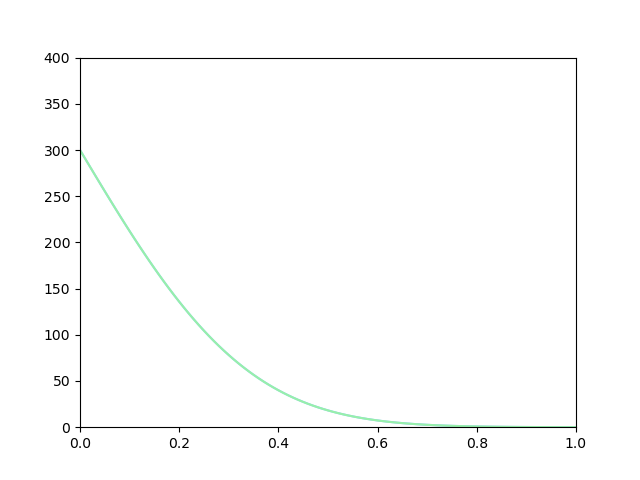

[[3.00000000e+02 1.00000000e-02 1.00000000e-02 ... 1.00000000e-02
  1.00000000e-02 0.00000000e+00]
 [3.00000000e+02 8.24629871e+01 1.53322095e+01 ... 9.50202209e-03
  7.46186793e-03 0.00000000e+00]
 [3.00000000e+02 1.26640850e+02 3.88282987e+01 ... 8.75774231e-03
  6.04570922e-03 0.00000000e+00]
 ...
 [3.00000000e+02 2.94643346e+02 2.89289370e+02 ... 1.79346573e+00
  9.32947115e-01 0.00000000e+00]
 [3.00000000e+02 2.94644417e+02 2.89291510e+02 ... 1.79490409e+00
  9.33696245e-01 0.00000000e+00]
 [3.00000000e+02 2.94645487e+02 2.89293648e+02 ... 1.79634231e+00
  9.34445301e-01 0.00000000e+00]]


In [14]:
#схема 2 трехступенчатая для линейного уравнения прогонкой гран условия первого рода
lambd = 0.1
Temp=300
L = 1
T = 1
C_p = 0.4
m =100
h = L / m
gran = 1
q = -1000
t = C_p * h ** 2 / lambd
n = int(T // t)
x_i = np.arange(0, L+h, h) # значения в узлах по х
t_j = np.linspace(0, T, n) # значение в узлах по t
r_j = len(t_j) # количество узлов по t
r_i = len(x_i) # количество узлов по x
g_t_h = np.zeros([r_j, r_i]) # итоговая сетка размером t_j*x_i, просто температура, t
g1_t_h = np.zeros([r_j, r_i]) # т с волной t
g2_t_h = np.zeros([r_j, r_i]) # т с чертой t / 2
g3_t_h = np.zeros([r_j, r_i]) # т с крышкой t / 2
def fi(x, Temp):
    ans = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] == 0:
            ans[i] = Temp
        else: 
            ans[i] = 0.01
    return(ans)
T_t_0 = fi(x_i, Temp) # значение при t = 0
T_x_0 = Temp # значение при x = 0
T_x_L = 0
if gran == 1:
    g_t_h[0] = T_t_0 # инициализация сетки t = 0
    g1_t_h[0] = T_t_0 # инициализация сетки t = 0
    g2_t_h[0] = T_t_0 # инициализация сетки t = 0
    g3_t_h[0] = T_t_0 # инициализация сетки t = 0
    for i in range(n):
        g_t_h[i][0] = T_x_0 # граничное условие при х =0
        g1_t_h[i][0] = T_x_0 # граничное условие при х =0
        g2_t_h[i][0] = T_x_0 # граничное условие при х =0
        #g3_t_h[i][0] = T_x_0 # граничное условие при х =0
        g_t_h[i][r_i-1] = 0 # граничное условие при х =0
        g1_t_h[i][r_i-1] = 0 # граничное условие при х =0
        g2_t_h[i][r_i-1] = 0 # граничное условие при х =0
        g3_t_h[i][r_i-1] = 0 # граничное условие при х =0
print(g_t_h)
alph1 = np.zeros([r_i-1])
beta1 = np.zeros([r_i-1])
alph2 = np.zeros([r_i-1])
beta2 = np.zeros([r_i-1])
alph3 = np.zeros([r_i-1])
beta3 = np.zeros([r_i-1])
for j in range(r_j-1):
    alph1[0] = 0
    beta1[0] = g_t_h[j+1][0]
    alph2[0] = 0
    beta2[0] = g_t_h[j+1][0]
    alph3[0] = 0
    for i in range(1, r_i-1): #вычисляем коэффициенты альфа и бета для g1
        alph1[i] = C_p / (-C_p* alph1[i - 1] + 1 + 2 * C_p)
        beta1[i] = (g_t_h[j][i] + C_p * beta1[i-1]) / (-C_p * alph1[i-1] + 1 + 2 * C_p)
        alph2[i] = 0.5*C_p / (-0.5*C_p* alph2[i - 1] + 1 + C_p)
        beta2[i] = (g_t_h[j][i] + 0.5*C_p * beta2[i-1]) / (-0.5*C_p * alph2[i-1] + 1 + C_p)   
    #гран условие для первого рода
    g1_t_h[j+1][r_i-1] = (g_t_h[j][r_i-1] + C_p * beta1[r_i-2]) / (1 + 0.5 * C_p - C_p * alph1[r_i-2])
    g2_t_h[j+1][r_i-1] = (g_t_h[j][r_i-1] +0.5*C_p * beta2[r_i-2]) / (1 + C_p - 0.5*C_p * alph2[r_i-2])
    #g3_t_h[j+1][r_i-1] = (g2_t_h[j+1][r_i-1] +0.5*C_p * beta3[r_i-2]) / (1 + C_p - 0.5*C_p * alph3[r_i-2])

    for m in range(r_i - 2, -1, -1):#вычисляем прогонкой g1_t_h для шага по времени
        g1_t_h[j+1][m] = g1_t_h[j+1][m + 1] * alph1[m] + beta1[m]
        g2_t_h[j+1][m] = g2_t_h[j+1][m + 1] * alph2[m] + beta2[m]
    beta3[0] = g2_t_h[j+1][0]
    for i in range(1, r_i-1): #вычисляем коэффициенты альфа и бета для g1
        alph3[i] = 0.5*C_p / (-0.5*C_p* alph3[i - 1] + 1 + C_p)
        beta3[i] = (g2_t_h[j+1][i] + 0.5*C_p * beta3[i-1]) / (-0.5*C_p * alph3[i-1] + 1 + C_p)
    g3_t_h[j+1][r_i-1] = (g2_t_h[j+1][r_i-1] +0.5*C_p * beta3[r_i-2]) / (1 + C_p - 0.5*C_p * alph3[r_i-2])
    for m in range(r_i - 2, -1, -1):#вычисляем прогонкой g1_t_h для шага по времени
        g3_t_h[j+1][m] = g3_t_h[j+1][m + 1] * alph3[m] + beta3[m]
        g_t_h[j+1][m] = 2 * g3_t_h[j+1][m] - g1_t_h[j+1][m]
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(0, 400))
line = []
N = 2
for j in range(N):
    temp, = plt.plot([], [])
    line.append(temp)
line = tuple(line)
def init():
    for j in range(N):
        line[j].set_data([], [])
    return line,
def animate(i):
    #x_i = np.arange(0, L, h)
    #y = g_t_h[i]
    x_i = np.arange(0, L+h, h)
    y1 = g_t_h[i]
    ksi = x_i / (2 * np.sqrt(lambd * i * t))
    y2 = Temp * special.erfc(ksi)
    line[0].set_data(x_i, y1)
    line[1].set_data(x_i, y2)
    return line,
 
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=20000, interval=10, blit=True, repeat = False)    
#print(g_t_h)
#print(alph1)
#print(alph2)
#print(alph3)
#print(beta1)
print(g_t_h)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<IPython.core.display.Javascript object>


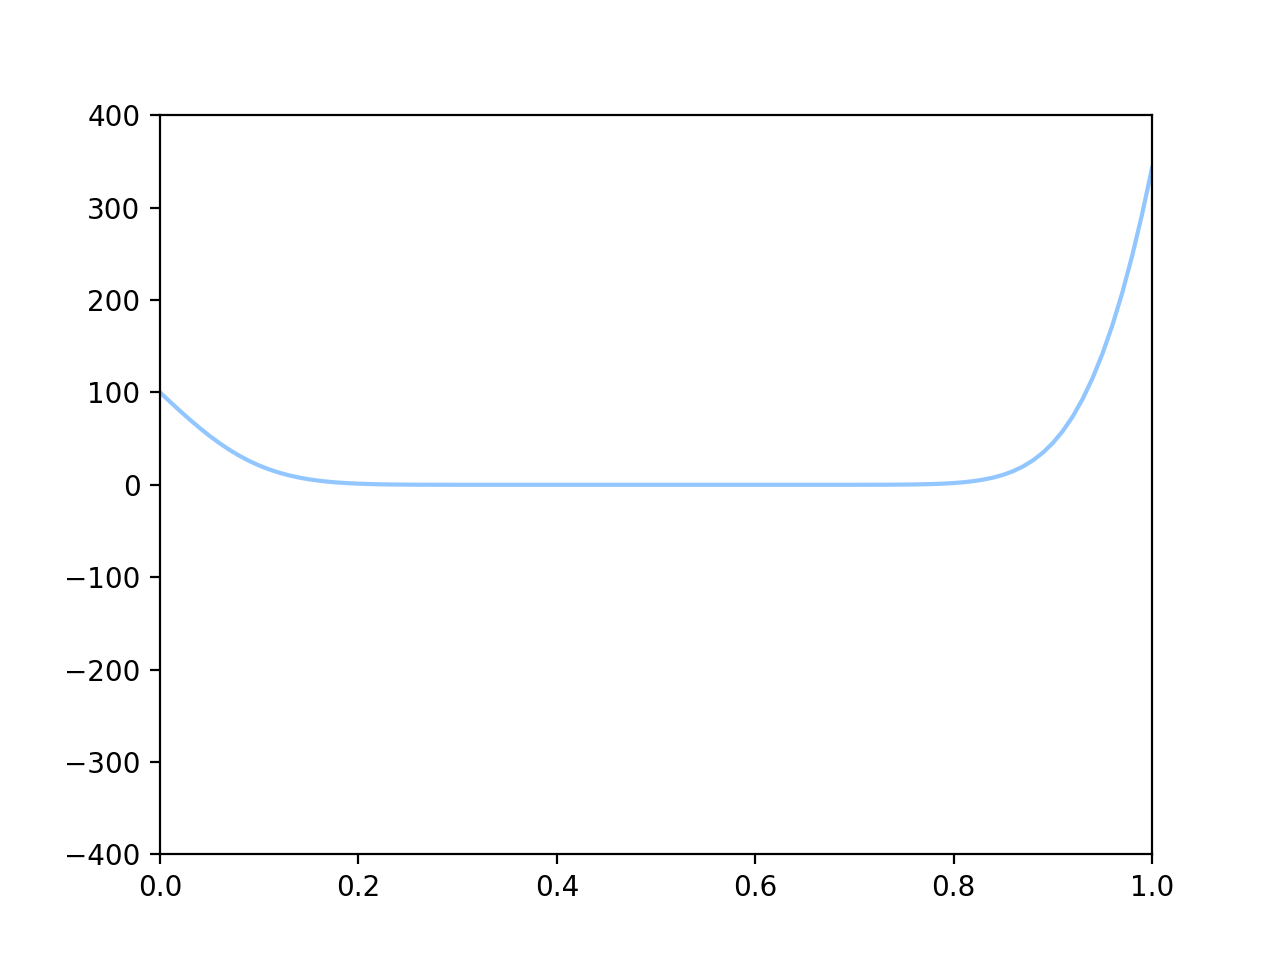

[[   0.            0.            0.         ...    0.
     0.            0.        ]
 [ 100.           27.48524521    5.10757343 ...    2.93524783
    16.67787043   66.67787043]
 [ 100.           42.21169036   12.93986422 ...    8.33964472
    29.4454899    79.4454899 ]
 ...
 [ 100.          100.81383464  101.63602374 ... 1713.9057022
  1762.99815285 1812.99815285]
 [ 100.          100.8171769   101.64271066 ... 1714.26851403
  1763.36113793 1813.36113793]
 [ 100.          100.82052012  101.64939949 ... 1714.63125669
  1763.72405373 1813.72405373]]


In [24]:
#схема 2 трехступенчатая для линейного уравнения прогонкой c гран условиями второго рода
lambd = 0.1
Temp=300
L = 1
T = 1
C_p = 0.4
m =100
h = L / m
q = 500
t = C_p * h ** 2 / lambd
n = int(T // t)
x_i = np.arange(0, L+h, h) # значения в узлах по х
t_j = np.linspace(0, T, n) # значение в узлах по t
r_j = len(t_j) # количество узлов по t
r_i = len(x_i) # количество узлов по x
g_t_h = np.zeros([r_j, r_i]) # итоговая сетка размером t_j*x_i, просто температура, t
g1_t_h = np.zeros([r_j, r_i]) # т с волной t
g2_t_h = np.zeros([r_j, r_i]) # т с чертой t / 2
g3_t_h = np.zeros([r_j, r_i]) # т с крышкой t / 2
def fi(x, Temp):
    ans = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] == 0:
            ans[i] = Temp
        else: 
            ans[i] = 0.01
    return(ans)
T_t_0 = fi(x_i, Temp) # значение при t = 0
T_x_0 = Temp # значение при x = 0
T_x_L = 0
print(g_t_h)
alph1 = np.zeros([r_i-1])
beta1 = np.zeros([r_i-1])
alph2 = np.zeros([r_i-1])
beta2 = np.zeros([r_i-1])
alph3 = np.zeros([r_i-1])
beta3 = np.zeros([r_i-1])
for j in range(r_j-1):
    #alph1[0] = 1
    #beta1[0] = q * h / lambd
    #g_t_h[j+1][0] = g_t_h[j][1] * alph1[0] + beta1[0]
    #alph2[0] = 1
    #beta2[0] = q *h / lambd
    #alph3[0] = 1
    #beta3[0] = q * h / lambd
    alph1[0] = 0
    beta1[0] = 100
    alph2[0] = 0
    beta2[0] = 100
    alph3[0] = 0
    beta3[0] = 100
    for i in range(1, r_i-1): #вычисляем коэффициенты альфа и бета для g1
        alph1[i] = C_p / (-C_p* alph1[i - 1] + 1 + 2 * C_p)
        beta1[i] = (g_t_h[j][i] + C_p * beta1[i-1]) / (-C_p * alph1[i-1] + 1 + 2 * C_p)
        alph2[i] = 0.5*C_p / (-0.5*C_p* alph2[i - 1] + 1 + C_p)
        beta2[i] = (g_t_h[j][i] + 0.5*C_p * beta2[i-1]) / (-0.5*C_p * alph2[i-1] + 1 + C_p)
    
    #g_t_h[j+1][r_i-1] = (beta1[r_i-2] + q * h / lambd) / (1 - alph1[r_i-2])   #для условия справа
    g1_t_h[j+1][r_i-1] = (beta1[r_i-2] + q * h / lambd) / (1 - alph1[r_i-2])
    g2_t_h[j+1][r_i-1] = (beta2[r_i-2] + q * h / lambd) / (1 - alph2[r_i-2])
    #g1_t_h[j+1][r_i-1] = (g_t_h[j+1][r_i-1] + C_p * beta1[r_i-2]) / (1 + 2 * C_p - C_p * alph1[r_i-2])
    #g2_t_h[j+1][r_i-1] = (g_t_h[j+1][r_i-1] +0.5*C_p * beta2[r_i-2]) / (1 + C_p - 0.5*C_p * alph2[r_i-2])

    for m in range(r_i - 2, -1, -1):#вычисляем прогонкой g1_t_h для шага по времени
        g1_t_h[j+1][m] = g1_t_h[j+1][m + 1] * alph1[m] + beta1[m]
        g2_t_h[j+1][m] = g2_t_h[j+1][m + 1] * alph2[m] + beta2[m]
    for i in range(1, r_i-1): #вычисляем коэффициенты альфа и бета для g1
        alph3[i] = 0.5*C_p / (-0.5*C_p* alph3[i - 1] + 1 + C_p)
        beta3[i] = (g2_t_h[j+1][i] + 0.5*C_p * beta3[i-1]) / (-0.5*C_p * alph3[i-1] + 1 + C_p)
    #beta3[0] = g2_t_h[j+1][0]
    #g3_t_h[j+1][r_i-1] = (g2_t_h[j+1][r_i-1] +0.5*C_p * beta3[r_i-2]) / (1 + C_p - 0.5*C_p * alph3[r_i-2])
    g3_t_h[j+1][r_i-1] = (beta3[r_i-2] + q * h / lambd) / (1 - alph3[r_i-2])
    for m in range(r_i - 2, -1, -1):#вычисляем прогонкой g1_t_h для шага по времени
        g3_t_h[j+1][m] = g3_t_h[j+1][m + 1] * alph3[m] + beta3[m]
        g_t_h[j+1][m] = 2 * g3_t_h[j+1][m] - g1_t_h[j+1][m]
    g_t_h[j+1][r_i-1] = 2 * g3_t_h[j+1][r_i-1]-g1_t_h[j+1][r_i-1]
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(-400, 400))
line = []
N = 2
for j in range(N):
    temp, = plt.plot([], [])
    line.append(temp)
line = tuple(line)
def init():
    for j in range(N):
        line[j].set_data([], [])
    return line,
def animate(i):
    #x_i = np.arange(0, L, h)
    #y = g_t_h[i]
    x_i = np.arange(0, L+h, h)
    y1 = g_t_h[i]
    ksi = x_i / (2 * np.sqrt(lambd * i * t))
    y2 = Temp * special.erfc(ksi)
    line[0].set_data(x_i, y1)
    #line[1].set_data(x_i, y2)
    return line,
 
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=20000, interval=10, blit=True, repeat = False)   
print(g_t_h)

<IPython.core.display.Javascript object>


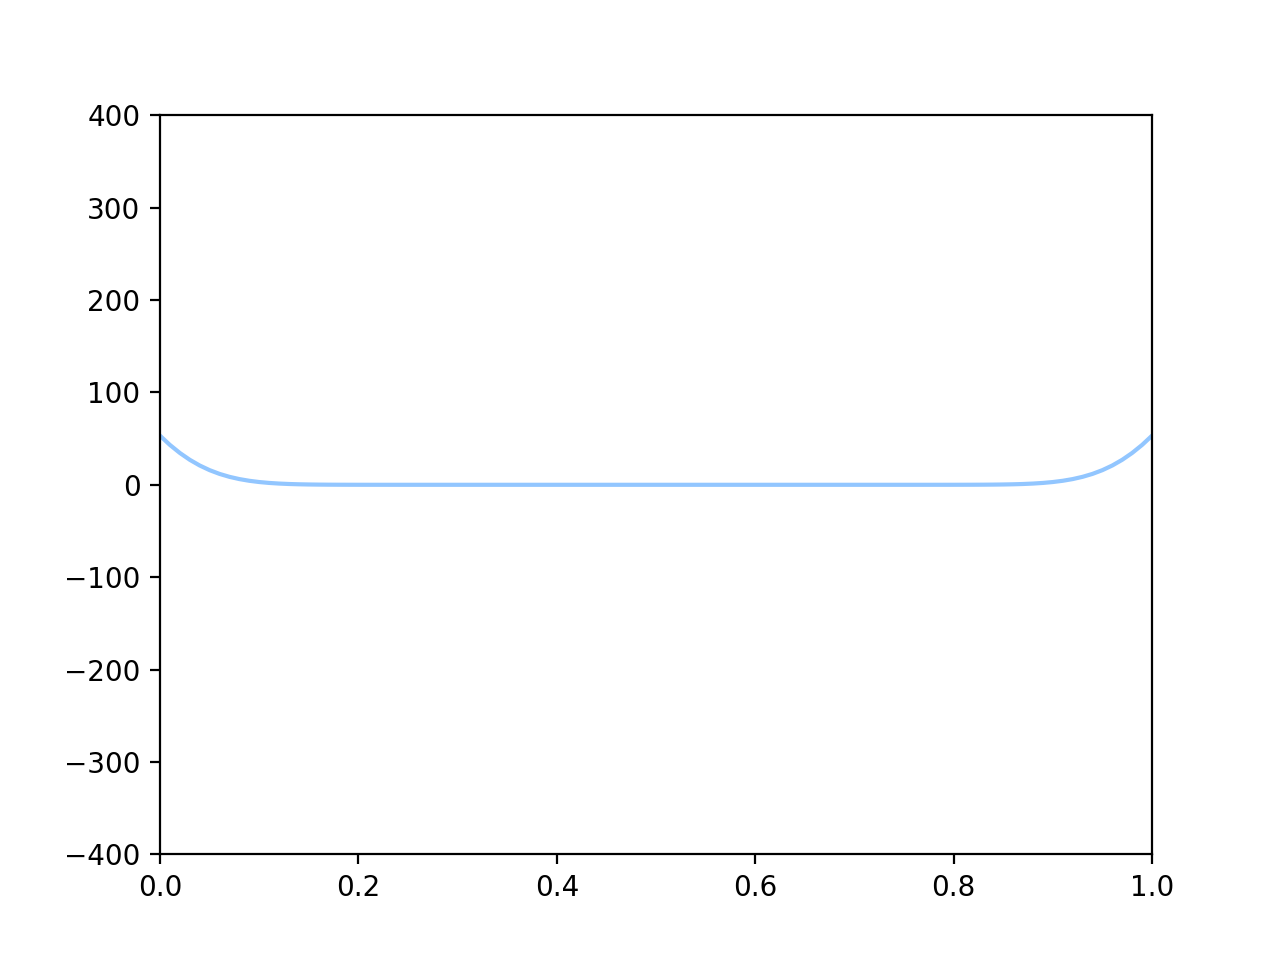

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.09160798e+01 9.16079783e-01 7.68776141e-02 ... 7.68776141e-02
  9.16079783e-01 1.09160798e+01]
 [1.17612340e+01 1.76123404e+00 2.12776585e-01 ... 2.12776585e-01
  1.76123404e+00 1.17612340e+01]
 ...
 [3.70181034e+02 3.60181034e+02 3.50390270e+02 ... 3.50390270e+02
  3.60181034e+02 3.70181034e+02]
 [3.70201958e+02 3.60201958e+02 3.50411191e+02 ... 3.50411191e+02
  3.60201958e+02 3.70201958e+02]
 [3.70222881e+02 3.60222881e+02 3.50432111e+02 ... 3.50432111e+02
  3.60222881e+02 3.70222881e+02]]


In [7]:
#одноступенчатая схема для прогонки,условие второго рода
lambd = 0.1
Temp=200
L = 1
T = 1
C_p = 0.1
m = 100
h = L / m
q = 100
t = C_p * h ** 2 / lambd
n = int(T // t)
x_i = np.arange(0, L+h, h) # значения в узлах по х
t_j = np.linspace(0, T, n) # значение в узлах по t
r_j = len(t_j) # количество узлов по t
r_i = len(x_i) # количество узлов по x
g_t_h = np.zeros([r_j, r_i]) # итоговая сетка размером t_j*x_i, просто температура, t
g1_t_h = np.zeros([r_j, r_i]) # т с волной t
g2_t_h = np.zeros([r_j, r_i]) # т с чертой t / 2
g3_t_h = np.zeros([r_j, r_i]) # т с крышкой t / 2
def fi(x, Temp):
    ans = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] == 0:
            ans[i] = Temp
        else: 
            ans[i] = 0.1
    return(ans)
T_t_0 = fi(x_i, Temp) # значение при t = 0
T_x_0 = Temp # значение при x = 0
T_x_L = 0
#g_t_h[0] = T_t_0 # инициализация сетки t = 0
#g1_t_h[0] = T_t_0 # инициализация сетки t = 0
#g2_t_h[0] = T_t_0 # инициализация сетки t = 0
#g3_t_h[0] = T_t_0 # инициализация сетки t = 0
#for i in range(n):
    #g_t_h[i][0] = T_x_0 # граничное условие при х =0
#print(g_t_h)
alph1 = np.zeros([r_i-1])
beta1 = np.zeros([r_i-1])

for j in range(r_j-1):
    #alph1[0] = 0
    #beta1[0] = g_t_h[j+1][0]
    alph1[0] = 1
    beta1[0] = q * h / lambd
    #g_t_h[j+1][r_i-1] = (beta1[r_i-2] + q * h / lambd) / (1 - alph1[r_i-2])
    for i in range(1, r_i-1): #вычисляем коэффициенты альфа и бета для g1
        alph1[i] = C_p / (-C_p* alph1[i - 1] + 1 + 2 * C_p)
        beta1[i] = (g_t_h[j][i] + C_p * beta1[i-1]) / (-C_p * alph1[i-1] + 1 + 2 * C_p)
    g_t_h[j+1][r_i-1] = (beta1[r_i-2] + q * h / lambd) / (1 - alph1[r_i-2])
    #g_t_h[j+1][r_i-1] = (g_t_h[j+1][r_i-1] + C_p * beta1[r_i-2]) / (1 + 2 * C_p - C_p * alph1[r_i-2])
    #g_t_h[j+1][r_i-1] = (beta1[r_i-2] - q * h / lambd) / (1 - alph1[r_i-2])
    for m in range(r_i - 2, -1, -1):#вычисляем прогонкой g1_t_h для шага по времени
        g_t_h[j+1][m] = g_t_h[j+1][m + 1] * alph1[m] + beta1[m]

fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(-400, 400))
line = []
N = 2
for j in range(N):
    temp, = plt.plot([], [])
    line.append(temp)
line = tuple(line)
def init():
    for j in range(N):
        line[j].set_data([], [])
    return line,
def animate(i):
    #x_i = np.arange(0, L, h)
    #y = g_t_h[i]
    x_i = np.arange(0, L+h, h)
    y1 = g_t_h[i]
    ksi = x_i / (2 * np.sqrt(lambd * i * t))
    y2 = Temp * special.erfc(ksi)
    line[0].set_data(x_i, y1)
    #line[1].set_data(x_i, y2)
    return line,
 
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=25000, interval=1, blit=True, repeat = False)
print(g_t_h)

[[1.   0.01 0.01 ... 0.01 0.01 0.  ]
 [1.   0.   0.   ... 0.   0.   0.  ]
 [1.   0.   0.   ... 0.   0.   0.  ]
 ...
 [1.   0.   0.   ... 0.   0.   0.  ]
 [1.   0.   0.   ... 0.   0.   0.  ]
 [1.   0.   0.   ... 0.   0.   0.  ]]


<IPython.core.display.Javascript object>


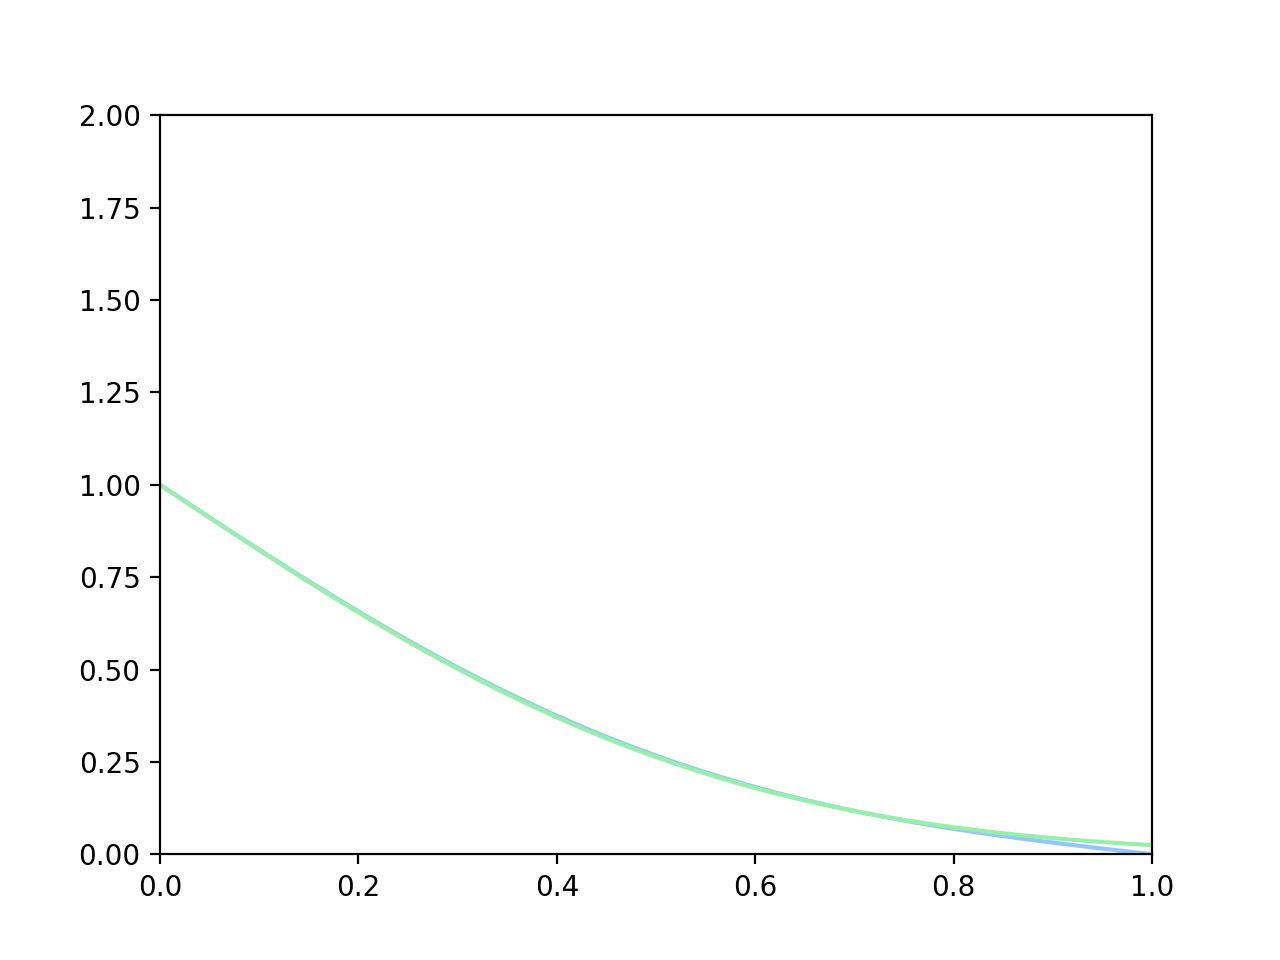

[[1.         0.01       0.01       ... 0.01       0.01       0.        ]
 [1.         0.28210393 0.06056498 ... 0.00949366 0.00732052 0.        ]
 [1.         0.42789573 0.13810466 ... 0.00875774 0.00610185 0.        ]
 ...
 [1.         0.98229352 0.96459581 ... 0.00650424 0.00347791 0.        ]
 [1.         0.98229703 0.96460282 ... 0.00650911 0.00348053 0.        ]
 [1.         0.98230053 0.96460984 ... 0.00651399 0.00348316 0.        ]]


In [3]:
#нелинейная схема 2
#схема 2 трехступенчатая для линейного уравнения прогонкой гран условия первого рода
lambd = 0.1
Temp=1
sigm = 0.1
L = 1
T = 1
C_p = 0.4
m =100
h = L / m
t = C_p * h ** 2 / lambd
coef = t /(h ** 2)
n = int(T // t)
eps = 0.01
x_i = np.arange(0, L+h, h) # значения в узлах по х
t_j = np.linspace(0, T, n) # значение в узлах по t
r_j = len(t_j) # количество узлов по t
r_i = len(x_i) # количество узлов по x
g_t_h = np.zeros([r_j, r_i]) # итоговая сетка размером t_j*x_i, просто температура, t
g1_t_h = np.zeros([r_j, r_i]) # т с волной t
g2_t_h = np.zeros([r_j, r_i]) # т с чертой t / 2
g3_t_h = np.zeros([r_j, r_i]) # т с крышкой t / 2
def fi(x, Temp):
    ans = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] == 0:
            ans[i] = Temp
        else: 
            ans[i] = eps
    return(ans)
T_t_0 = fi(x_i, Temp) # значение при t = 0
T_x_0 = Temp # значение при x = 0
T_x_L = 0
g_t_h[0] = T_t_0 # инициализация сетки t = 0
g1_t_h[0] = T_t_0 # инициализация сетки t = 0
g2_t_h[0] = T_t_0 # инициализация сетки t = 0
g3_t_h[0] = T_t_0 # инициализация сетки t = 0
for i in range(n):
    g_t_h[i][0] = T_x_0 # граничное условие при х =0
    g1_t_h[i][0] = T_x_0 # граничное условие при х =0
    g2_t_h[i][0] = T_x_0 # граничное условие при х =0
    g_t_h[i][r_i-1] = 0 # граничное условие при х =0
    g1_t_h[i][r_i-1] = 0 # граничное условие при х =0
    g2_t_h[i][r_i-1] = 0 # граничное условие при х =0
    g3_t_h[i][r_i-1] = 0 # граничное условие при х =0
print(g_t_h)
alph1 = np.zeros([r_i-1])
beta1 = np.zeros([r_i-1])
alph2 = np.zeros([r_i-1])
beta2 = np.zeros([r_i-1])
alph3 = np.zeros([r_i-1])
beta3 = np.zeros([r_i-1])
lambd_plus = np.zeros([r_i-1])
lambd_minus = np.zeros([r_i-1])
for j in range(r_j-1):
    alph1[0] = 0
    beta1[0] = g_t_h[j+1][0]
    alph2[0] = 0
    beta2[0] = g_t_h[j+1][0]
    alph3[0] = 0
    for i in range(1, r_i-1): #вычисляем коэффициенты альфа и бета для g1
        lambd_i_1 = lambd * (g_t_h[j][i - 1])**sigm
        lambd_i = lambd * (g_t_h[j][i])**sigm
        lambd_i1 = lambd * (g_t_h[j][i+1])**sigm
        lambd_plus[i] = 2 * (lambd_i * lambd_i1) / (lambd_i + lambd_i1)
        lambd_minus[i] = 2 * (lambd_i*lambd_i_1) / (lambd_i + lambd_i_1)
        alph1[i] = C_p / (-C_p* alph1[i - 1] + 1 + 2 * C_p)
        beta1[i] = (g_t_h[j][i] + C_p * beta1[i-1]) / (-C_p * alph1[i-1] + 1 + 2 * C_p)
        alph2[i] = 0.5*C_p / (-0.5*C_p* alph2[i - 1] + 1 + C_p)
        beta2[i] = (g_t_h[j][i] + 0.5*C_p * beta2[i-1]) / (-0.5*C_p * alph2[i-1] + 1 + C_p)   
    #гран условие для первого рода
    g1_t_h[j+1][r_i-1] = (g_t_h[j][r_i-1] + coef * lambd_minus[r_i-2] * beta1[r_i-2]) / (1 + (lambd_plus[r_i-2]+lambd_minus[r_i-2]) * coef - coef * lambd_minus[r_i-2]* alph1[r_i-2])
    g2_t_h[j+1][r_i-1] = (g_t_h[j][r_i-1] + 0.5*coef * lambd_minus[r_i-2] * beta1[r_i-2]) / (1 + 0.5*(lambd_plus[r_i-2]+lambd_minus[r_i-2]) * coef - 0.5*coef * lambd_minus[r_i-2]* alph1[r_i-2])

    for m in range(r_i - 2, -1, -1):#вычисляем прогонкой g1_t_h для шага по времени
        g1_t_h[j+1][m] = g1_t_h[j+1][m + 1] * alph1[m] + beta1[m]
        g2_t_h[j+1][m] = g2_t_h[j+1][m + 1] * alph2[m] + beta2[m]
    beta3[0] = g2_t_h[j+1][0]
    for i in range(1, r_i-1): #вычисляем коэффициенты альфа и бета для g1
        alph3[i] = 0.5*C_p / (-0.5*C_p* alph3[i - 1] + 1 + C_p)
        beta3[i] = (g2_t_h[j+1][i] + 0.5*C_p * beta3[i-1]) / (-0.5*C_p * alph3[i-1] + 1 + C_p)
    g3_t_h[j+1][r_i-1] = (g2_t_h[j][r_i-1] + 0.5*coef * lambd_minus[r_i-2] * beta1[r_i-2]) / (1 + 0.5*(lambd_plus[r_i-2]+lambd_minus[r_i-2]) * coef - 0.5*coef * lambd_minus[r_i-2]* alph1[r_i-2])
    for m in range(r_i - 2, -1, -1):#вычисляем прогонкой g1_t_h для шага по времени
        g3_t_h[j+1][m] = g3_t_h[j+1][m + 1] * alph3[m] + beta3[m]
        g_t_h[j+1][m] = 2 * g3_t_h[j+1][m] - g1_t_h[j+1][m]
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(0, 2))
line = []
N = 2
for j in range(N):
    temp, = plt.plot([], [])
    line.append(temp)
line = tuple(line)
def init():
    for j in range(N):
        line[j].set_data([], [])
    return line,
def animate(i):
    #x_i = np.arange(0, L, h)
    #y = g_t_h[i]
    x_i = np.arange(0, L+h, h)
    y1 = g_t_h[i]
    ksi = x_i / (2 * np.sqrt(lambd * i * t))
    y2 = Temp * special.erfc(ksi)
    line[0].set_data(x_i, y1)
    line[1].set_data(x_i, y2)
    return line,
 
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=20000, interval=10, blit=True, repeat = False)    
print(g_t_h)